In [26]:
import geopy
from geopy.geocoders import Nominatim
from geopy.geocoders import ArcGIS
from geopy.extra.rate_limiter import RateLimiter

import geopandas 
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt #to make sure there are no errors when plotting a graph
import pyproj
import contextily as cx

import branca
import jinja2
import requests
import folium


In [2]:
df = pd.DataFrame({'NER Places': ['Laredo', 'Belmont', 'Gonzales', 'Encinal', 'Karnes']})

df = pd.DataFrame(df, columns=["NER Places"])
geolocator = ArcGIS(user_agent='CorridosMap')
geocode = lambda query: geolocator.geocode("%s, Texas" % query)
df['Location'] = df['NER Places'].apply(geocode)

df

,NER Places,Location
0,Laredo,"(Laredo, Texas, (27.530920000000037, -99.50230..."
1,Belmont,"(Belmont, Texas, (29.52287000000007, -97.68328..."
2,Gonzales,"(Gonzales, Texas, (29.500150000000076, -97.452..."
3,Encinal,"(Encinal, Texas, (28.046230000000037, -99.3566..."
4,Karnes,"(Karnes County, Texas, (28.905630820000056, -9..."


In [3]:
gpd = geopandas.tools.geocode(df.Location, provider='ArcGIS')
gpd.type

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

In [4]:
gpd.crs
gpd = geopandas.GeoDataFrame(df)
gpd

,NER Places,Location
0,Laredo,"(Laredo, Texas, (27.530920000000037, -99.50230..."
1,Belmont,"(Belmont, Texas, (29.52287000000007, -97.68328..."
2,Gonzales,"(Gonzales, Texas, (29.500150000000076, -97.452..."
3,Encinal,"(Encinal, Texas, (28.046230000000037, -99.3566..."
4,Karnes,"(Karnes County, Texas, (28.905630820000056, -9..."


In [5]:
gpd = geopandas.tools.geocode(df.Location, provider='ArcGIS')
gpd

,geometry,address
0,POINT (-99.50231 27.53092),"Laredo, Texas"
1,POINT (-97.68329 29.52287),"Belmont, Texas"
2,POINT (-97.45223 29.50015),"Gonzales, Texas"
3,POINT (-99.35670 28.04623),"Encinal, Texas"
4,POINT (-97.85942 28.90563),"Karnes County, Texas"


In [49]:
# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in gpd.geometry]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    # assign a color marker for the type of volcano, Strato being the most common
    if gpd.geometry[i] == "Karnes County, Texas":
        type_color = "green"
    elif gpd.geometry[i] == "Gonzales, Texas":
        type_color = "blue"
    elif gpd.geometry[i] == "Belmont, Texas":
        type_color = "orange"
    elif gpd.geometry[i] == "Laredo, Texas":
        type_color = "pink"
    else:
        type_color = "purple"

    # Place the markers with the popup labels and data

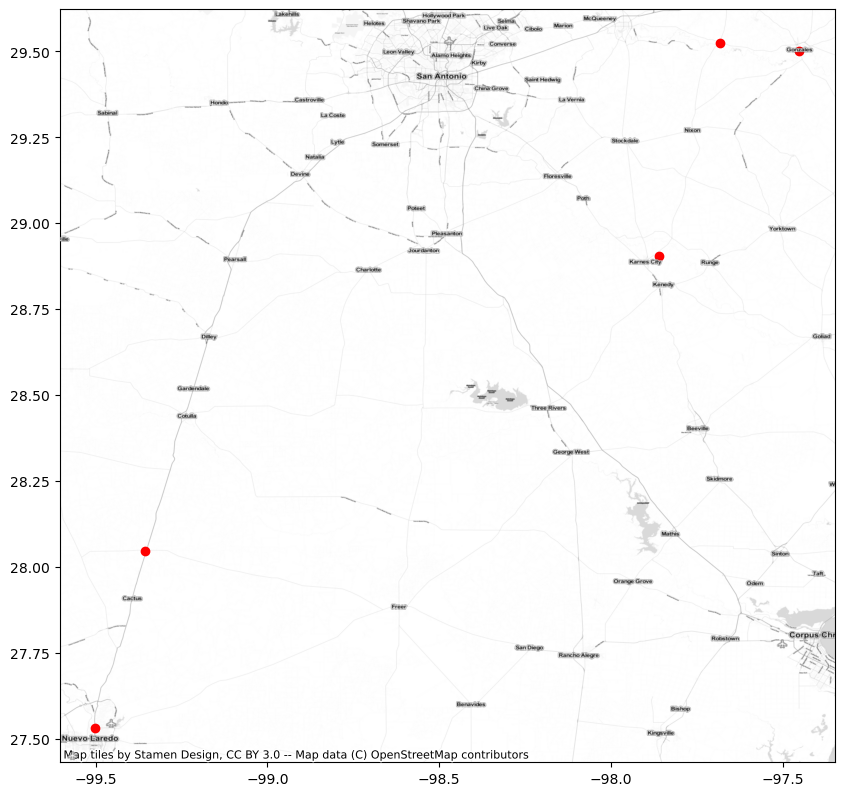

In [50]:
ax = gpd.plot(color="red", figsize=(10,10))

#cx.add_basemap(ax, crs=gpd.crs)
cx.add_basemap(ax, crs=gpd.crs, source=cx.providers.Stamen.TonerLite, zoom=12)
cx.add_basemap(ax, crs=gpd.crs, source=cx.providers.Stamen.TonerLabels, zoom=10)

